<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [355]:
import matplotlib.pyplot as plt

% matplotlib inline

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import metrics
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [357]:
print (boston.feature_names)
Z = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
Z['MEDV'] = pd.DataFrame(boston.target, columns=["MEDV"])
Z.shape
Z.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [358]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
Z.head()
Z.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [359]:

Z.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [360]:
Z.shape

(506, 14)

In [361]:

Z.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [362]:
df_no_missing = Z.dropna()
df_no_missing
df_no_missing.shape

(506, 14)

### Removal of  maximum unique outlier for the feature . Do not  remove  the outliers if there are duplicates.

In [363]:

total_features = Z.iloc[0:0]



In [364]:
#totsl_features = 
Z.iloc[0:0]
#print (total_features)
for i,x in enumerate(Z.iloc[0:0]):
   
    dummy_max = Z.loc[Z[x] == Z[x].max()]
    if (len(dummy_max)==1) :
        print ("The  unique MAX value for ",x , "is " , Z[x].max() , "\n")
        print (dummy_max,"\n")
        #shd.drop(703, inplace = True)
        print (dummy_max.index[0])
        Z.drop(dummy_max.index[0], inplace = True )
        print (Z.shape)
    else :
        print ( "There is no unique MAX value for ", x ,"\n")

The  unique MAX value for  CRIM is  88.9762 

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
380  88.9762  0.0   18.1   0.0  0.671  6.968  91.9  1.4165  24.0  666.0   

     PTRATIO      B  LSTAT  MEDV  
380     20.2  396.9  17.21  10.4   

380
(505, 14)
The  unique MAX value for  ZN is  100.0 

       CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
57  0.01432  100.0   1.32   0.0  0.411  6.816  40.5  8.3248  5.0  256.0   

    PTRATIO      B  LSTAT  MEDV  
57     15.1  392.9   3.95  31.6   

57
(504, 14)
There is no unique MAX value for  INDUS 

There is no unique MAX value for  CHAS 

There is no unique MAX value for  NOX 

The  unique MAX value for  RM is  8.78 

        CRIM   ZN  INDUS  CHAS    NOX    RM   AGE     DIS   RAD    TAX  \
364  3.47428  0.0   18.1   1.0  0.718  8.78  82.9  1.9047  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
364     20.2  354.55   5.29  21.9   

364
(503, 14)
There is no unique MAX value for  AGE 



### Removal of minimum unique outlier for the feature . Do not remove outlier if there are duplicates.

In [365]:
for i,x in enumerate(Z.iloc[0:0]):
    dummy_min = Z.loc[Z[x] == Z[x].min()]   
    if (len(dummy_min)==1) :
        print ("The unique MIN value for ",x , "is " , Z[x].min() , "\n")
        print (dummy_min,"\n")
        print (dummy_min.index[0])
        Z.drop(dummy_min.index[0], inplace = True )
        print (Z.shape)
    else :
        print ( "There is no unique Min value for ", x ,"\n")

The unique MIN value for  CRIM is  0.00632 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0   

0
(500, 14)
There is no unique Min value for  ZN 

The unique MIN value for  INDUS is  0.46 

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
195  0.01381  80.0   0.46   0.0  0.422  7.875  32.0  5.6484  4.0  255.0   

     PTRATIO       B  LSTAT  MEDV  
195     14.4  394.23   2.97  50.0   

195
(499, 14)
There is no unique Min value for  CHAS 

The unique MIN value for  NOX is  0.385 

        CRIM    ZN  INDUS  CHAS    NOX    RM   AGE     DIS  RAD    TAX  \
286  0.01965  80.0   1.76   0.0  0.385  6.23  31.5  9.0892  1.0  241.0   

     PTRATIO      B  LSTAT  MEDV  
286     18.2  341.6  12.93  20.1   

286
(498, 14)
The unique MIN value for  RM is  3.561 

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE  

In [366]:
print (Z.shape)

print (Z.describe)

(493, 14)
<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5 

### Removal of  outlier for the feature and keep  95 percent of the data  within 1.96 standard deviations

In [367]:

copydf_sd  =  Z
copydf_sd.shape
for i,x in enumerate(Z.iloc[0:0]):
    stdX  =  Z[(x)].std()
    meanX =  Z[x].mean()
    topX  =  meanX  +  stdX  *  1.95
    botX  =  meanX -  stdX  *  1.95

    #copydf  =  X

    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]>  topX].index)
    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]<  botX].index)
    copydf_sd = copydf_sd.sort_values(by=[x])
    print ("The shape of X after   ",x,"  using standard deviation    removal is  ", copydf_sd.shape)

copydf_sd.shape


The shape of X after    CRIM   using standard deviation    removal is   (474, 14)
The shape of X after    ZN   using standard deviation    removal is   (436, 14)
The shape of X after    INDUS   using standard deviation    removal is   (424, 14)
The shape of X after    CHAS   using standard deviation    removal is   (392, 14)
The shape of X after    NOX   using standard deviation    removal is   (380, 14)
The shape of X after    RM   using standard deviation    removal is   (361, 14)
The shape of X after    AGE   using standard deviation    removal is   (350, 14)
The shape of X after    DIS   using standard deviation    removal is   (337, 14)
The shape of X after    RAD   using standard deviation    removal is   (337, 14)
The shape of X after    TAX   using standard deviation    removal is   (337, 14)
The shape of X after    PTRATIO   using standard deviation    removal is   (328, 14)
The shape of X after    B   using standard deviation    removal is   (301, 14)
The shape of X after    

(292, 14)

In [368]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 1 to 505
Data columns (total 14 columns):
CRIM       493 non-null float64
ZN         493 non-null float64
INDUS      493 non-null float64
CHAS       493 non-null float64
NOX        493 non-null float64
RM         493 non-null float64
AGE        493 non-null float64
DIS        493 non-null float64
RAD        493 non-null float64
TAX        493 non-null float64
PTRATIO    493 non-null float64
B          493 non-null float64
LSTAT      493 non-null float64
MEDV       493 non-null float64
dtypes: float64(14)
memory usage: 77.8 KB


In [369]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
print (Z.shape)
Y = Z[['MEDV']]


X = Z[boston.feature_names]
XS = ss.fit_transform(X)
y = ss.fit_transform(Y)




(493, 14)


In [370]:
print (Z.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.208310  0.426282 -0.062562  0.441417 -0.262927  0.368745   
ZN      -0.208310  1.000000 -0.522834 -0.032527 -0.508548  0.318596 -0.570633   
INDUS    0.426282 -0.522834  1.000000  0.049195  0.758131 -0.405500  0.637979   
CHAS    -0.062562 -0.032527  0.049195  1.000000  0.076683  0.075971  0.079265   
NOX      0.441417 -0.508548  0.758131  0.076683  1.000000 -0.309791  0.726683   
RM      -0.262927  0.318596 -0.405500  0.075971 -0.309791  1.000000 -0.239858   
AGE      0.368745 -0.570633  0.637979  0.079265  0.726683 -0.239858  1.000000   
DIS     -0.396915  0.647871 -0.703270 -0.085946 -0.767869  0.204470 -0.748547   
RAD      0.659648 -0.306347  0.587687 -0.032146  0.601715 -0.208820  0.447137   
TAX      0.613572 -0.299279  0.714654 -0.060559  0.657546 -0.296232  0.495007   
PTRATIO  0.298872 -0.383507  0.373809 -0.141624  0.173574 -0.355459  0.253228   
B       -0.436725  0.177211 

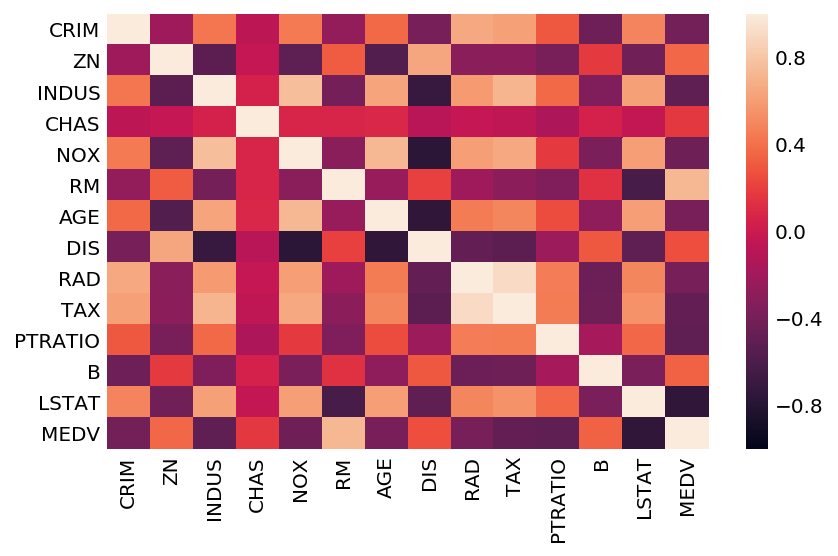

In [371]:

sns.heatmap(Z.corr(), vmin=-1, vmax=1)

     I have selected  the following feature based on their corr  for linear regression
    
     -0.410372 for  CRIM     per capita crime rate by town
 
      0.733657 for  RM       average number of rooms per dwelling

     -0.743782 for  LSTAT    % lower status of the population
       

In [372]:
Select_feature=["CRIM","RM","LSTAT"]
XS_Set1=Z[Select_feature]
XS_Set1.head()

,CRIM,RM,LSTAT
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33
5,0.02985,6.430,5.21


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [373]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Initialize the StandardScaler object


In [374]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(XS_Set1)
y = ss.fit_transform(Y)


### Original data using linear regression with cross validation

In [375]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xs, y, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[ 0.69946281  0.66056922 -1.22468309  0.56401459  0.63087255  0.54389761
  0.28953605  0.21895767 -1.73211114  0.20433851]
0.08548547833706299


In [376]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y)

print(optimal_ridge.alpha_)

172.25859653987874


In [377]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.66382922  0.6778862  -0.26273611  0.3836187   0.58802437  0.32941672
  0.3967308   0.33620962 -1.53344905  0.27075775]
0.1850288233190387


### Observations : Ridge score  18.5% performs better than cross validation score 8.5%

### Reduced data ( keeping only  95 percent of the data is within 1.96 standard deviations) using linear regression with cross validation

In [378]:


Select_feature=["CRIM","RM","LSTAT"]
XS_Set1_sd=copydf_sd[Select_feature]
Xs_sd = ss.fit_transform(XS_Set1_sd)

Y_sd = copydf_sd[['MEDV']]
y_sd = ss.fit_transform(Y_sd)

linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xs_sd, y_sd, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))


[  -6.60584976  -11.84151296  -25.55893143 -138.96339041  -76.34405601
  -49.44956389  -74.83133924  -41.77325402   -4.65545049  -10.17960923]
-44.02029574183429


In [379]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_sd, y_sd)

print(optimal_ridge.alpha_)

775.2597488629465


In [380]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs_sd, y_sd, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[-24.08500841 -30.12261326 -30.44021885 -55.57323213 -21.02337763
  -8.34046307 -13.30533347 -18.78427837  -9.20320609 -21.17871149]
-23.20564427778363


### Observations : Ridge score  -23% performs better than cross validation score -44%

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [381]:
import patsy

In [382]:

def linear_regression(split_size):
    y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=Z, return_type="dataframe")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=99)
    X_train = ss.fit_transform(X_train)
    y_train = ss.fit_transform(y_train)
    y_test = ss.fit_transform(y_test)
    X_test = ss.fit_transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("The intercept of AGE and RM as as follows : " ,lr.intercept_)
    print("The coeff of AGE and RM as as follows : " ,lr.coef_)


    print ("test to train split : " , split_size)
    print ("Linear Regression score for test set :",lr.score(X_test,y_test))
    print ("Linear Regression score for train set :", lr.score(X_train,y_train))


    return

In [383]:
linear_regression(0.7)

The intercept of AGE and RM as as follows :  [-6.32435047e-15]
The coeff of AGE and RM as as follows :  [[ 0.         -0.16799455  0.78636446]]
test to train split :  0.7
Linear Regression score for test set : 0.49325667691443326
Linear Regression score for train set : 0.7103365944865127


### Observations : for every inscrease in MEDV using a test:train ratio = 0.7   , there will be -0.16 drop in AGE and 0.786 inscrease in RM.

In [384]:
linear_regression(0.3)

The intercept of AGE and RM as as follows :  [-7.08147865e-15]
The coeff of AGE and RM as as follows :  [[ 0.         -0.21103602  0.72160488]]
test to train split :  0.3
Linear Regression score for test set : 0.4666219676959613
Linear Regression score for train set : 0.6351978279891837


### Observations : for every inscrease in MEDV using a test:train ratio = 0.3   , there will be -0.21 drop in AGE and 0.72 inscrease in RM.

In [385]:
linear_regression(0.1)

The intercept of AGE and RM as as follows :  [-2.16240618e-16]
The coeff of AGE and RM as as follows :  [[ 0.         -0.23471808  0.70795679]]
test to train split :  0.1
Linear Regression score for test set : 0.18696956752999083
Linear Regression score for train set : 0.6358084287475594


### Observations : for every inscrease in MEDV using a test:train ratio = 0.1   , there will be -0.234 drop in AGE and 0.707 inscrease in RM.

### There is positive correlation between MEDV with RM
### There is negative correlation between MEDV with  AGE

### Reducing the Training set size improve the score
### Training set 30%  , Test set 70% perform better with 49.32% as compare with 
### Training set 50% , Test set 50% score of 46.6% and
### Training set 90% , Test set 10% score of 18.69%



### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [386]:
from sklearn import model_selection
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=Z, return_type="dataframe")

def Cross_validation(K_split):
    mse_values = []
    scores = []
    n = 0
    kf = model_selection.KFold(n_splits=K_split, shuffle=True)
    print("~~~~ CROSS VALIDATION each fold ~~~~")
    for train_index, test_index in kf.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
        scores.append(lr.score(X, y))
    
        n += 1
    
        print('Model {}'.format(n))
        print('MSE: {}'.format(mse_values[n-1]))
        print('R2: {}\n'.format(scores[n-1]))


    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all ',K_split, ' folds: {}'.format(np.mean(mse_values)))
    print('Mean of R2 for all ',K_split, '  folds: {}'.format(np.mean(scores)))

In [387]:
Cross_validation(3)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 27.80596417273812
R2: 0.5848950458357066

Model 2
MSE: 40.53052792346032
R2: 0.5843514159537486

Model 3
MSE: 33.39586616897443
R2: 0.5843256393478117

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all  3  folds: 33.91078608839096
Mean of R2 for all  3   folds: 0.5845240337124223


In [388]:
Cross_validation(5)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 38.364870677450305
R2: 0.5849830863069411

Model 2
MSE: 15.500961401078836
R2: 0.5850617757004608

Model 3
MSE: 31.381605034287652
R2: 0.5835877146801585

Model 4
MSE: 35.56119684013301
R2: 0.583965056140489

Model 5
MSE: 50.4620122315525
R2: 0.584479916996872

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all  5  folds: 34.254129236900454
Mean of R2 for all  5   folds: 0.5844155099649843


In [389]:
Cross_validation(7)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 19.30815546190237
R2: 0.585016657695959

Model 2
MSE: 35.16942792607204
R2: 0.5843920012111208

Model 3
MSE: 29.14661439099112
R2: 0.583280149206926

Model 4
MSE: 31.269666319510517
R2: 0.5846129453124387

Model 5
MSE: 26.714567035430395
R2: 0.5847248680433427

Model 6
MSE: 35.23293089812429
R2: 0.5851980158511951

Model 7
MSE: 64.04323601705633
R2: 0.5844395258416144

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all  7  folds: 34.41208543558387
Mean of R2 for all  7   folds: 0.5845234518803709


In [390]:
Cross_validation(10)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 36.39959541317995
R2: 0.5849684853171118

Model 2
MSE: 49.30578405300484
R2: 0.5852383343045894

Model 3
MSE: 31.239741328117265
R2: 0.5852442942339606

Model 4
MSE: 33.673730394189946
R2: 0.5849060602342004

Model 5
MSE: 23.63827195882268
R2: 0.584903931425715

Model 6
MSE: 19.17759647140283
R2: 0.5852305959567927

Model 7
MSE: 35.30285156777761
R2: 0.5840714715797231

Model 8
MSE: 57.92339143289094
R2: 0.5839799560442458

Model 9
MSE: 32.31879130065356
R2: 0.5847877234707697

Model 10
MSE: 23.004965302214572
R2: 0.5851273151302129

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all  10  folds: 34.198471922225416
Mean of R2 for all  10   folds: 0.5848458167697321


### Observation :
### Both the R2 and MSE improve when the K fold increase in count.
### MSE improves from 34.1027 to 34.51
### R2 improves from 0.58399 to   0.58469

# KNN Practice

In [391]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [392]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [393]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [394]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [395]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


In [396]:
feature_names= set(iris['species'])

iris_dict={x:i for i,x in enumerate(feature_names)}
iris['species_num']=iris.apply(lambda row: iris_dict[row.species] , axis=1)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [397]:
iris.describe()
X=iris.drop(['species','species_num'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create your target vector "y"
This will be the species type.

In [398]:
y=iris['species_num']
y = np.ravel(y)


### Make Use of Train-Test-Split
Split your data in to train and test sets.

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [399]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [400]:
def Knn_model(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    print("print KNN accuracy with n_neighbors  ",n, " is =  ", metrics.accuracy_score(y_test, y_pred_class))
    return (metrics.accuracy_score(y_test, y_pred_class))
Knn_model(1)

print KNN accuracy with n_neighbors   1  is =   0.9210526315789473


0.9210526315789473

In [401]:
Knn_model(20)


print KNN accuracy with n_neighbors   20  is =   0.9210526315789473


0.9210526315789473

### Create a Model With Five Neighbors. Did it Improve?

In [402]:
Knn_model(5)


print KNN accuracy with n_neighbors   5  is =   0.9210526315789473


0.9210526315789473

### No improvement observed .

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [403]:
knn_list = [Knn_model(i) for i in range(1,110)]
K=max(knn_list)



print KNN accuracy with n_neighbors   1  is =   0.9210526315789473
print KNN accuracy with n_neighbors   2  is =   0.9210526315789473
print KNN accuracy with n_neighbors   3  is =   0.9210526315789473
print KNN accuracy with n_neighbors   4  is =   0.9210526315789473
print KNN accuracy with n_neighbors   5  is =   0.9210526315789473
print KNN accuracy with n_neighbors   6  is =   0.9210526315789473
print KNN accuracy with n_neighbors   7  is =   0.9473684210526315
print KNN accuracy with n_neighbors   8  is =   0.9210526315789473
print KNN accuracy with n_neighbors   9  is =   0.9473684210526315
print KNN accuracy with n_neighbors   10  is =   0.9210526315789473
print KNN accuracy with n_neighbors   11  is =   0.9473684210526315
print KNN accuracy with n_neighbors   12  is =   0.9210526315789473
print KNN accuracy with n_neighbors   13  is =   0.9473684210526315
print KNN accuracy with n_neighbors   14  is =   0.9210526315789473
print KNN accuracy with n_neighbors   15  is =   0.947368

In [404]:

print ("The highest accuracy is " ,K)
print ("The number of Neighbors is : " ,1+ knn_list.index(K))


The highest accuracy is  0.9736842105263158
The number of Neighbors is :  25


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

## Return probability estimates for the test data X_new

In [405]:
def Knn_model1(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    print ("Predicted Y \n", knn.predict_proba(X_test))
    print ("\n actual Y = \n" , y_test)
    print("print KNN accuracy with n_neighbors  ",n, " is =  ", metrics.accuracy_score(y_test, y_pred_class))
    return (metrics.accuracy_score(y_test, y_pred_class))

Knn_model1(1)

Predicted Y 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]

 actual Y = 
 [0 1 2 0 1 2 2 0 1 2 0 2 0 2 0 1 1 2 2 0 2 2 1 2 0 1 1 0 2 0 1 0 1 2 2 1 1
 0]
print KNN accuracy with n_neighbors   1  is =   0.9210526315789473


0.9210526315789473

### Answer :Return the predicted Y  for knn.predict_proba(X_test)

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [406]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [407]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):          1.59e-321
Time:                        22:55:28   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

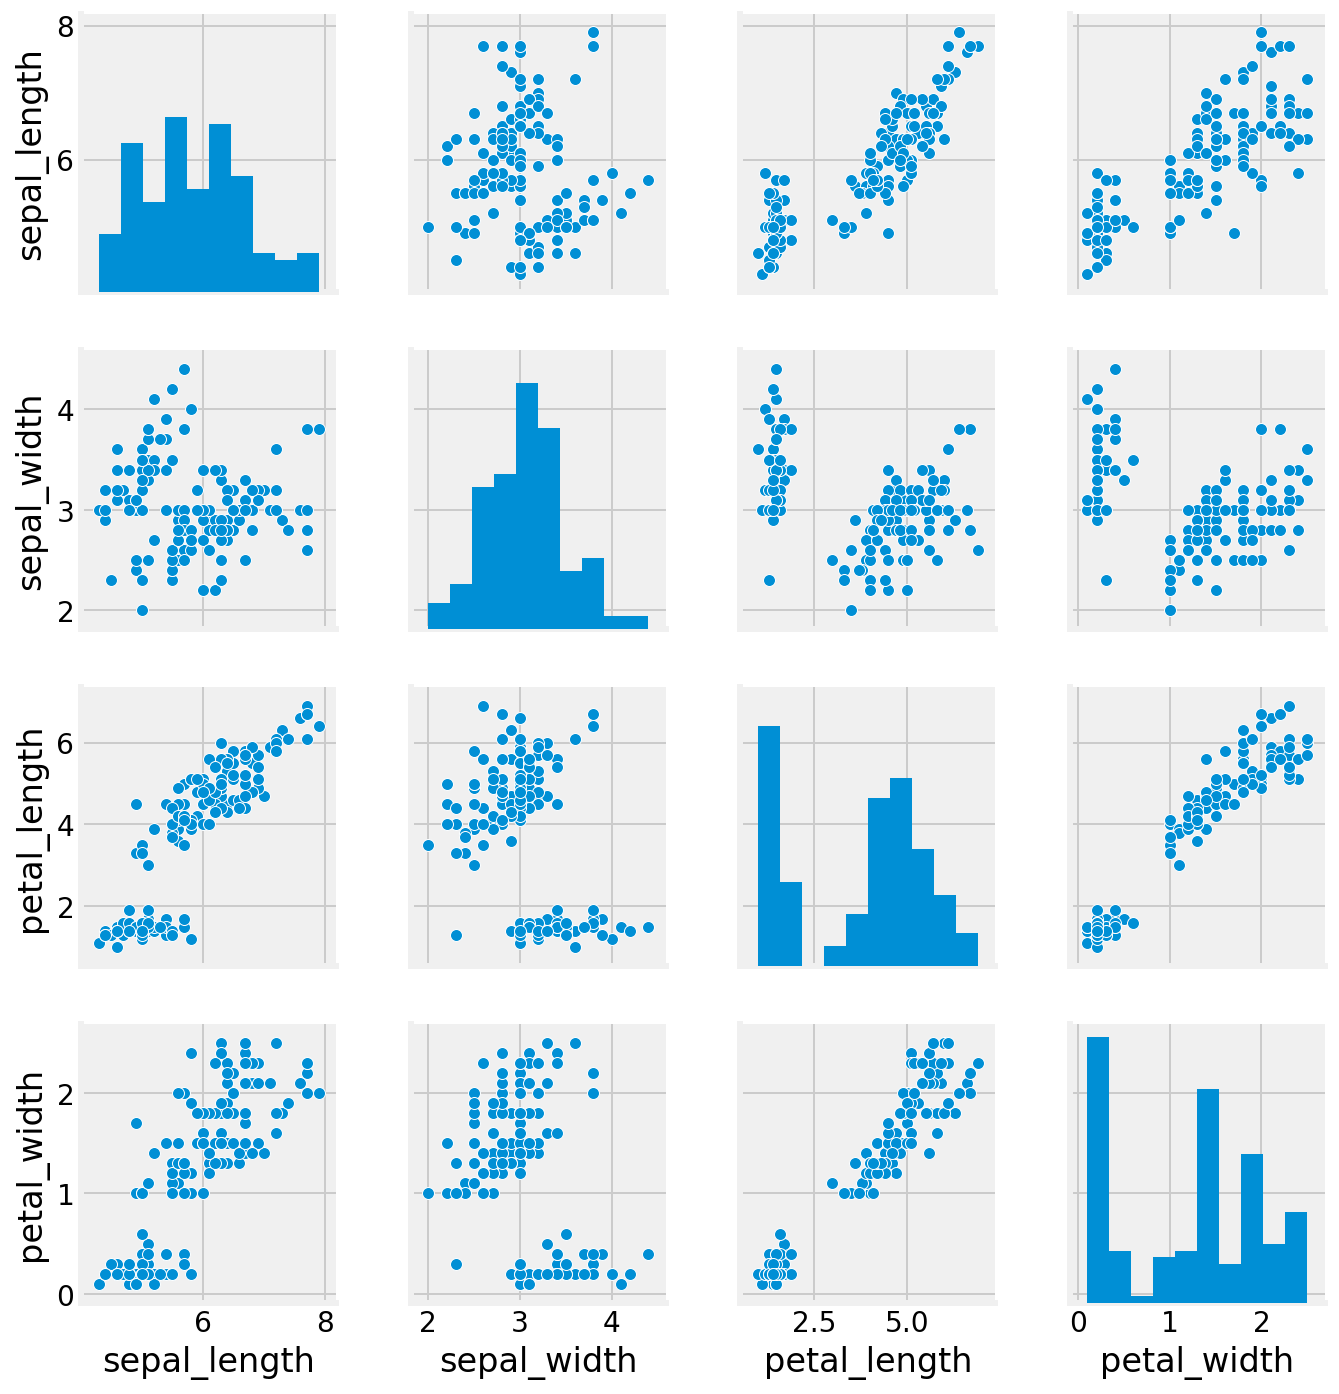

In [408]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [409]:
# Check out Pearson scores


## Demo: Patsy

In [410]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

ValueError: Length of values does not match length of index

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))